In [12]:
## Bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.models import load_model
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import tensorflow as tf

import joblib
import os
import random
import time

In [13]:
## Carregando Informações da ITUB4ITUB4

# Tempo inicial de compilação
_start_time = time.time()

acao = 'ITUB4'

modelo_base = load_model('Modelo_VALE3.keras')
modelo_base.compile(optimizer='adam', loss='mse')

X_train = np.load(f'X_train_{acao}.npy')
y_train = np.load(f'y_train_{acao}.npy')
X_test = np.load(f'X_test_{acao}.npy')
y_test = np.load(f'y_test_{acao}.npy')
y_real = np.load(f'y_real_{acao}.npy')
scaler = joblib.load(f'scaler_{acao}.pkl')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
## Aplicação do Transfer Learning + Treinamento

modelo_transferido = modelo_base

modelo_transferido.fit(
    X_train, y_train,
    epochs=22,
    batch_size=30,
    validation_data=(X_test, y_test)
)

Epoch 1/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 2.2835e-04 - val_loss: 1.4509e-04
Epoch 2/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1169e-04 - val_loss: 1.5677e-04
Epoch 3/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4174e-04 - val_loss: 1.6215e-04
Epoch 4/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0462e-04 - val_loss: 1.4596e-04
Epoch 5/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0711e-04 - val_loss: 2.2141e-04
Epoch 6/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9700e-04 - val_loss: 1.8037e-04
Epoch 7/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.9973e-04 - val_loss: 2.0752e-04
Epoch 8/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.0145e-04 - val_loss: 1.7507e-04
Epoch 9/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.8277e-04 - val_loss: 2.2759e-04
Epoch 10/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0232e-04 - val_loss: 9.7414e-04
Epoch 11/22
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3781e-0

In [15]:
## Predição e Desnormalização

y_pred = modelo_transferido.predict(X_test)

y_pred_real = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((len(y_pred), scaler.n_features_in_ - 1))], axis=1))[:, 0]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [16]:
## Métricas

print("MAE:", mean_absolute_error(y_real, y_pred_real))
print("MAPE:", mean_absolute_percentage_error(y_real, y_pred_real))
print("R²:", r2_score(y_real, y_pred_real))

MAE: 0.2811354683011766
MAPE: 0.010152329581376867
R²: 0.9912179782852543


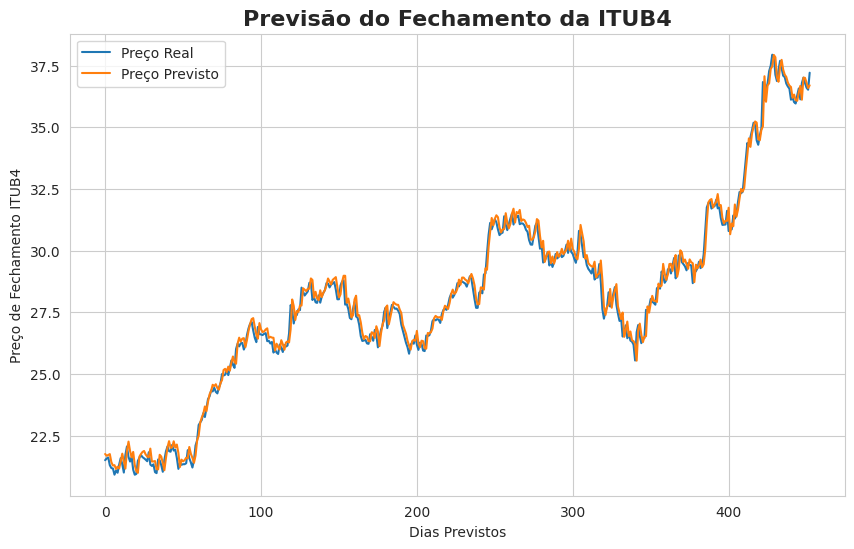

In [17]:
## Gráfico

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
plt.plot(y_real, label='Preço Real')
plt.plot(y_pred_real, label='Preço Previsto')
plt.xlabel('Dias Previstos')
plt.ylabel(f'Preço de Fechamento {acao}')
plt.title(f'Previsão do Fechamento da {acao}', fontweight='bold', fontsize=16)
plt.legend()
plt.show()

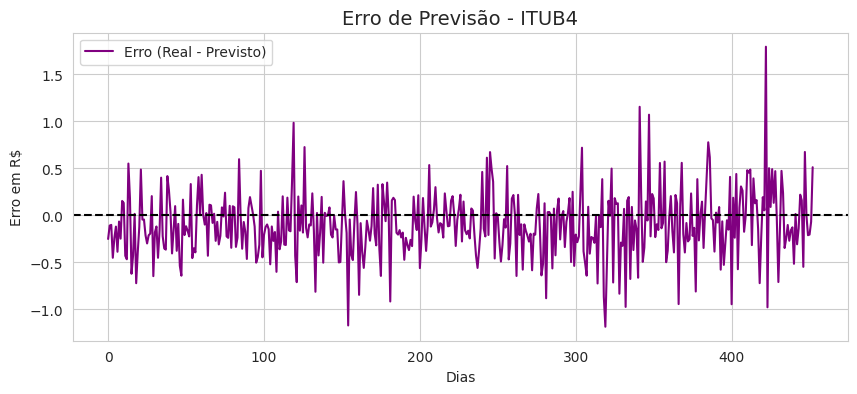

In [18]:
## Gráfico

plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

erro = y_real.flatten() - y_pred_real.flatten()  # Garante que são vetores 1D

plt.plot(erro, label='Erro (Real - Previsto)', color='purple')
plt.axhline(0, color='black', linestyle='--')

plt.title(f'Erro de Previsão - {acao}', fontsize=14)
plt.xlabel('Dias')
plt.ylabel('Erro em R$')
plt.legend()
plt.show()

In [19]:
## Salvar o modelo

modelo_transferido.save('Modelo_ITUB4.keras', save_format='keras')
modelo_transferido.save('Modelo_ITUB4.h5')

In [20]:
## Tempo Final de Compilação

_end_time = time.time() - _start_time
print(f"Tempo total de execução: {_end_time:.2f} segundos")

Tempo total de execução: 33.97 segundos
